# extract $m_A$ from MC with $Q^2$-dependent correction

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0, '../mupClassification/');  sys.path.insert(0, '../off_beam_on_beam_5e19/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import seaborn as sns; sns.set(style="white", color_codes=True ,font_scale=2);
from axial_mass_tools import *
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


In [141]:
Evbins = np.linspace(0.1,1.5,10)
Q2bins = np.linspace(0,0.8,10)
largeQ2bins = Q2bins#np.linspace(0,1.2,15)
largeEvbins = Evbins #np.linspace(0,2.,20)
largeQ2bins_centers = 0.5*(largeQ2bins[1:] + largeQ2bins[:-1])
largeEvbins_centers = 0.5*(largeEvbins[1:] + largeEvbins[:-1])

# largeQ2bins = np.linspace(0,1.2,5)
# largeEvbins = np.linspace(0,2,4)
# largeQ2bins = np.linspace(0,1.2,15)
# largeEvbins = np.linspace(0,2.,20)

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/mA_extraction/'

In [4]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [5]:
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
non-collinearity first,90.4%,45.3%,94.8%,15.4%,"$|\theta_{1,2}-90^0|<60^0$",90.4% (3446),42.7% (1707),10.9% (2462),94.8% (1170)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
Pt no Delta phi,24.7%,88.7%,46.1%,53.6%,$p_{t}<0.35$ GeV/c,24.7% (941),2.5% (99),0.1% (21),46.1% (569)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)


# the acceptance of CC$1p0\pi$ events 

In [6]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_genie.csv')
print len(GENIEall),'CC interactions pairs in GENIE'

GENIE_CC1p0pi = GENIEall[GENIEall['IsCC_1p_200MeVc_0pi']==1]
GENIE_CC1p0pi_contained = GENIE_CC1p0pi[GENIE_CC1p0pi['IsVertexContained']==1]
GENIE_CC1p0pi_mu = GENIE_CC1p0pi_contained[GENIE_CC1p0pi_contained['Is_mu_TrackReconstructed']==1]
GENIE_CC1p0pi_mup = GENIE_CC1p0pi_contained[GENIE_CC1p0pi_contained['IsVertexReconstructed']==1]

CC1p0pi_samlpes = [GENIE_CC1p0pi,GENIE_CC1p0pi_contained,GENIE_CC1p0pi_mu,GENIE_CC1p0pi_mup]
CC1p0pi_labels = [r'all CC$1p0\pi$',r'$\nu$-int. contained',r'$\mu$-reconstructed',r'$\mu,p$-reconstructed']
CC1p0pi_colors = ['blue','black','red','forestgreen']

73444 CC interactions pairs in GENIE


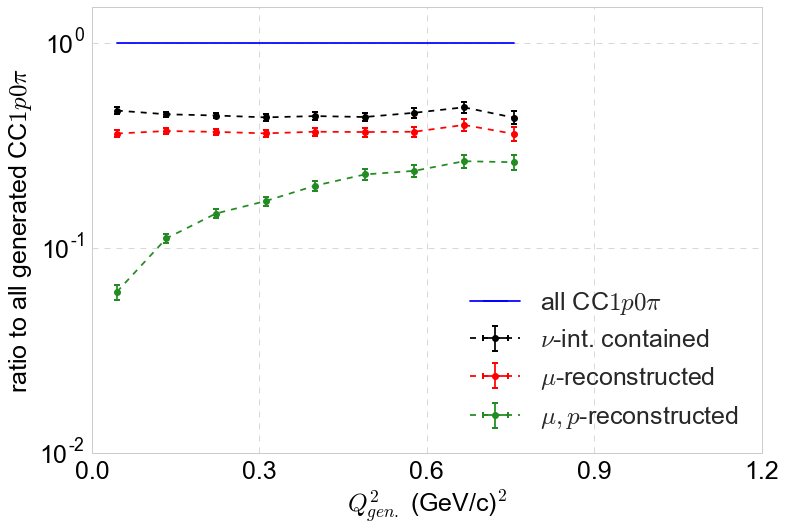

In [84]:
# fig:?
fig,ax = plt.subplots(figsize=(12,8))
h_CC1p0pi_all,bins = np.histogram(GENIE_CC1p0pi['truth_Q2'],bins=largeQ2bins)
acc_corr,acc_corr_err = dict(),dict()

for i,(sample,label,color) in enumerate(zip(CC1p0pi_samlpes,CC1p0pi_labels,CC1p0pi_colors)):
    h,bins = np.histogram(sample['truth_Q2'],bins=largeQ2bins); largeQ2bins_centers = 0.5*(bins[1:] + bins[:-1])
    ratio = h.astype(np.float)/h_CC1p0pi_all
    acc_corr[label] = 1./ratio
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC1p0pi_all ) if i>0 else 0
    acc_corr_err[label] = ratio_err/np.square(ratio)

    ax.errorbar( largeQ2bins_centers, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=7, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)
set_axes(ax,x_label=r'$Q^2_{gen.}$ (GeV/c)$^2$'
         ,y_label=r'ratio to all generated CC$1p0\pi$'
         ,fontsize=25
         ,xticks=np.linspace(0,1.2,5)
         ,ylim=(1e-2,1.5)
         ,do_add_grid=True,do_add_legend=True
        )
ax.set_yscale('log');

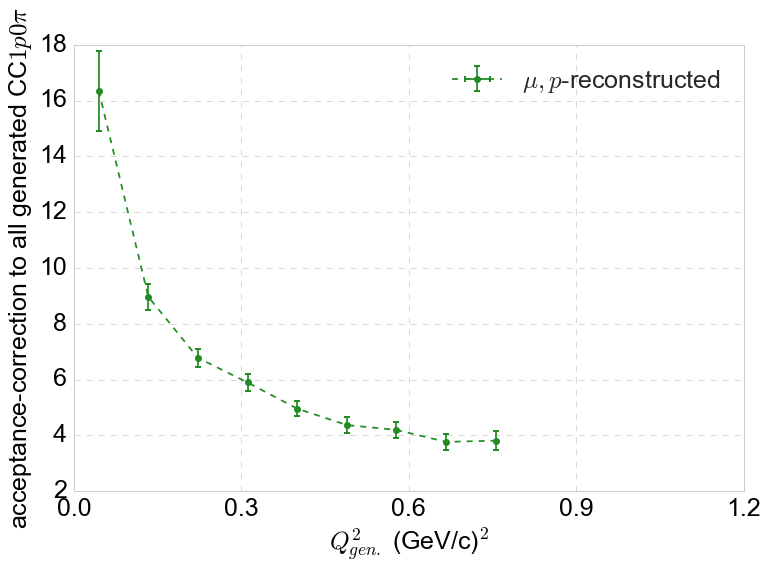

In [85]:
fig,ax = plt.subplots(figsize=(12,8))

ax.errorbar( largeQ2bins_centers, y=acc_corr[r'$\mu,p$-reconstructed'], yerr=acc_corr_err[r'$\mu,p$-reconstructed'] 
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=7, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)
set_axes(ax,x_label=r'$Q^2_{gen.}$ (GeV/c)$^2$'
         ,y_label=r'acceptance-correction to all generated CC$1p0\pi$'
         ,fontsize=25
         ,xticks=np.linspace(0,1.2,5)
#          ,ylim=(1e-2,1.5)
         ,do_add_grid=True,do_add_legend=True
        )
# ax.set_yscale('log');

# $Q^2$ reconstruction

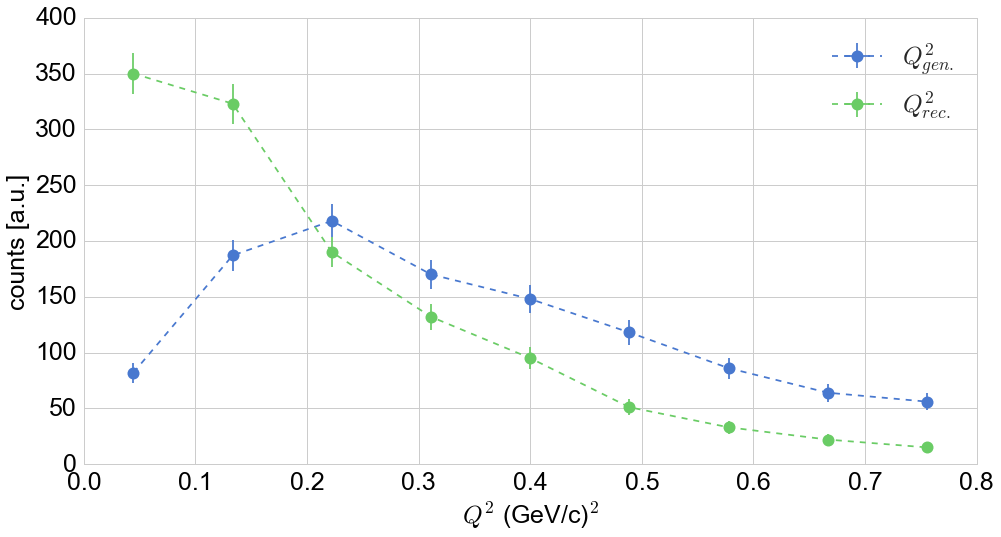

In [86]:
fig,ax = plt.subplots(figsize=(16,8))
pair_type, cut_name  = 'CC 1p 0pi' , 'no cut'#'1mu-1p'
sample  = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
for var,label,color in zip(['truth_Q2','reco_Q2']                   
                           ,[r'$Q^{2}_{gen.}$',r'$Q^{2}_{rec.}$']
                           ,['forestgreen','royalblue']):
    h,bins = np.histogram(sample[var],bins=Q2bins); Q2_centers = 0.5*(bins[1:] + bins[:-1])
    plt.errorbar( x = Q2_centers, xerr=0, markersize=12             
             ,y=h , yerr=np.sqrt(h)             
             ,fmt='--o', label=label)
set_axes(ax,r'$Q^{2}$ (GeV/c)$^{2}$','counts [a.u.]',do_add_legend=True)

# from reconstructed $Q^2$ to generated $Q^2$ after acceptance correction

NameError: name 'randomEv' is not defined

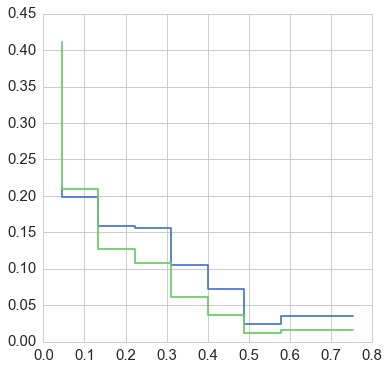

In [87]:
Q2_averages,Q2_stds=[],[]
debug = 0
N_rand = 1000
acc_geant = reduced_MCbnbDATAcosmicSamples['no cut']['CC 1p 0pi']
fig = plt.figure(figsize=(20,20))

for i,Q2bin in zip(range(len(Q2bins)-1),Q2bins):
    
    acc_geant_recQ2bin = acc_geant[(acc_geant['reco_Q2']>Q2bins[i]) & (acc_geant['reco_Q2']<Q2bins[i+1])]

    Q2_averages.append( np.mean(acc_geant_recQ2bin['reco_Q2']) )
    Q2_stds.append( np.std(acc_geant_recQ2bin['reco_Q2']) )
    
    ax = fig.add_subplot(len(Q2bins)/3,3,i+1)
    h_accepted,bins=np.histogram(acc_geant_recQ2bin['truth_Q2'],bins=largeQ2bins)
    h_accepted = (h_accepted).astype(np.float)/np.sum(h_accepted)
    largeQ2bins_centers = 0.5*(bins[1:] + bins[:-1])
    plt.step(largeQ2bins_centers, h_accepted ,label='reconstructed')

    h_acceptance_corrected = h_accepted * acc_corr[r'$\mu,p$-reconstructed']
    h_acceptance_corrected = (h_acceptance_corrected).astype(np.float)/np.sum(h_acceptance_corrected)
    plt.step(largeQ2bins_centers, h_acceptance_corrected ,label='acc. corrected')

    # randomly sample from the acceptance-corrected distribution
    h2generate_Q2 = h_acceptance_corrected
    gen_weights = h2generate_Q2.astype(np.float32)
    gen_weights = gen_weights/np.sum(gen_weights)
    rand_Q2 = []
    for i_rand in range(N_rand):
        rand_Q2.append( np.random.choice( largeQ2bins_centers, p=h_acceptance_corrected) )        
        # for each point, calculate the expected        
        rand_Qacc_geant_recQ2bin2_N_Xsec = N_CCelasticXsec( Q2=rand_Q2, Ev=randomEv, mA=mA , NormFact=NormFact)
    h_rand_Q2,bins=np.histogram(rand_Q2,bins=largeQ2bins)
    h_rand_Q2 = (h_rand_Q2).astype(np.float)/np.sum(h_rand_Q2)
    plt.step( largeQ2bins_centers, h_rand_Q2 ,label='random $Q^2_{gen.}$')



    set_axes(ax,r'$Q^{2}_{gen.}$ (GeV/c)$^{2}$','counts [a.u.]'
             ,title=r"$%.2f<Q^{2}_{rec.}<%.2f$"%(Q2bins[i],Q2bins[i+1])
             ,do_add_legend=True if i==0 else '')
    if debug:
        print 'Q2bin: %.2f<Q2<%.2f, <Q2>=%.2f+/-%.2f GeV/c2'%(Q2bins[i],Q2bins[i+1],Q2_averages[-1],Q2_stds[-1])
        print 'h_accepted:',h_accepted
        print 'h_acceptance_corrected:',h_acceptance_corrected
    
plt.tight_layout()    

## acceptance in 2D: $Q^2$ and $E_\nu$

largeQ2bins: [ 0.          0.08888889  0.17777778  0.26666667  0.35555556  0.44444444
  0.53333333  0.62222222  0.71111111  0.8       ]
Q2bin: 0.0
Q2bin: 0.0888888888889
Q2bin: 0.177777777778
Q2bin: 0.266666666667
Q2bin: 0.355555555556
Q2bin: 0.444444444444
Q2bin: 0.533333333333
Q2bin: 0.622222222222
Q2bin: 0.711111111111


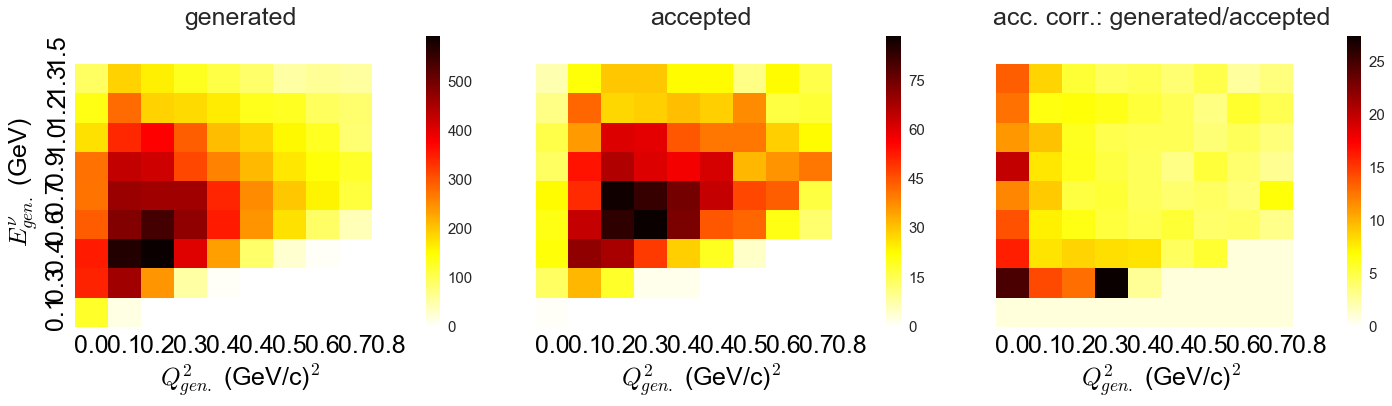

In [101]:
h_CC1p0pi_gen = np.zeros((len(largeQ2bins),len(largeEvbins)))
h_CC1p0pi_acc = np.zeros((len(largeQ2bins),len(largeEvbins)))
acc_corr_Q2Ev = np.zeros((len(largeQ2bins),len(largeEvbins)))
print 'largeQ2bins:',largeQ2bins
for i,Q2bin in zip(range(len(largeQ2bins)-1),largeQ2bins):
    print 'Q2bin:',Q2bin
    Q2min,Q2max = largeQ2bins[i],largeQ2bins[i+1]
    for j,Evbin in zip(range(len(largeEvbins)-1),largeEvbins):
        Evmin,Evmax = largeEvbins[j],largeEvbins[j+1]

        h_CC1p0pi_gen[i][j] = len(GENIE_CC1p0pi[(GENIE_CC1p0pi['truth_Q2']>Q2min)
                                                &(GENIE_CC1p0pi['truth_Q2']<Q2max)                                               
                                                &(GENIE_CC1p0pi['truth_Ev']>Evmin)
                                                &(GENIE_CC1p0pi['truth_Ev']<Evmax)])
        h_CC1p0pi_acc[i][j] = len(GENIE_CC1p0pi_mup[(GENIE_CC1p0pi_mup['truth_Q2']>Q2min)
                                                    &(GENIE_CC1p0pi_mup['truth_Q2']<Q2max)                                               
                                                    &(GENIE_CC1p0pi_mup['truth_Ev']>Evmin)
                                                    &(GENIE_CC1p0pi_mup['truth_Ev']<Evmax)])

        if h_CC1p0pi_acc[i][j]>1: acc_corr_Q2Ev[i][j] = h_CC1p0pi_gen[i][j]/h_CC1p0pi_acc[i][j]
        else: acc_corr_Q2Ev[i][j] = 1
#         print 'i,j:',i,j,',%.1f<Q2<%.1f, %.1f<Ev<%.1f'%(Q2min,Q2max,Evmin,Evmax)
#         print 'h_CC1p0pi_gen:',h_CC1p0pi_gen[i][j],',h_CC1p0pi_acc:',h_CC1p0pi_acc[i][j],',acc_corr_Q2Ev:',acc_corr_Q2Ev[i][j]
        
# fig = plt.figure(figsize=(20,6))
# for i,h,title in zip(range(3)
#                      ,[h_CC1p0pi_gen,h_CC1p0pi_acc,acc_corr_Q2Ev]
#                      ,['generated','accepted','acc. corr.: generated/accepted']):
#     ax = fig.add_subplot(1,3,i+1)    
#     pcmesh = plt.pcolormesh(X, Y, h,cmap='hot_r')
#     set_axes(ax
#              ,title=title
#              ,x_label=r'$Q^2_{gen.}$ (GeV/c)$^2$' 
#              ,y_label=r'$E^\nu_{gen.}$ (GeV)' if i==0 else ''
#              ,fontsize=25,do_add_grid=True,do_add_legend=True
#             )
#     if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
# plt.tight_layout()

fig = plt.figure(figsize=(20,6))
for i,h,title in zip(range(3)
                     ,[h_CC1p0pi_gen,h_CC1p0pi_acc,acc_corr_Q2Ev]
                     ,['generated','accepted','acc. corr.: generated/accepted']):
    h = h.T
    ax = fig.add_subplot(1,3,i+1)    
    sns.heatmap(h,cmap='hot_r'
#                 ,annot=True#,fmt='%.1f'
                ,xticklabels=['%.1f'%x for x in largeQ2bins] 
                ,yticklabels=['%.1f'%y for y in largeEvbins]
               )
    set_axes(ax
             ,title=title
             ,x_label=r'$Q^2_{gen.}$ (GeV/c)$^2$' 
             ,y_label=r'$E^\nu_{gen.}$ (GeV)' if i==0 else ''
             ,fontsize=25,do_add_grid=True,do_add_legend=True
            )
    ax.invert_yaxis()
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()

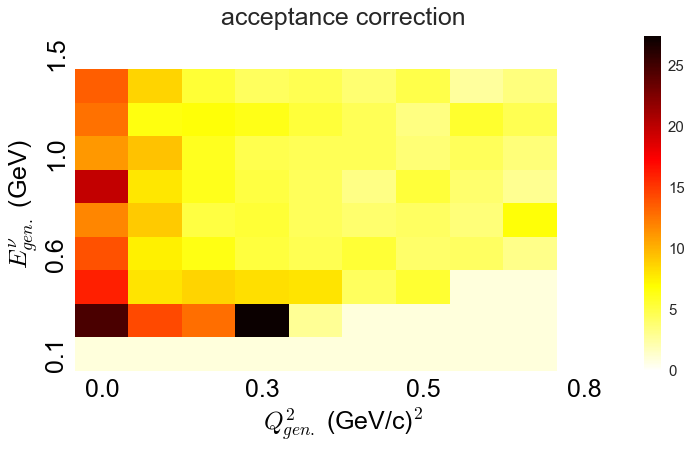

In [106]:

fig,ax = plt.subplots(figsize=(12,6))
xticks = largeQ2bins
xticks = ['%.1f'%x for x in xticks]
keptticks = xticks[::int(len(xticks)/10)]
xticks = ['' for x in xticks]
xticks[::int(len(xticks)/10)] = keptticks

yticks = largeEvbins
yticks = ['%.1f'%x for x in yticks]
keptticks = yticks[::int(len(yticks)/10)]
yticks = ['' for x in yticks]
yticks[::int(len(yticks)/10)] = keptticks

sns.heatmap(acc_corr_Q2Ev.T
            ,cmap='hot_r'
            #             ,annot=True#,fmt='%.1f'
            ,xticklabels=['%.1f'%largeQ2bins[i] if i%3==0 else '' for i in range(len(largeQ2bins))]
                ,yticklabels=['%.1f'%largeEvbins[i] if i%3==0 else '' for i in range(len(largeEvbins))]
               )
set_axes(ax
             ,title='acceptance correction'
             ,x_label=r'$Q^2_{gen.}$ (GeV/c)$^2$' 
             ,y_label=r'$E^\nu_{gen.}$ (GeV)' 
             ,fontsize=25,do_add_grid=True,do_add_legend=True
            )
ax.invert_yaxis()

# from reconstructed $Q^2$ to generated $(Q^2,E_\nu)$ after acceptance correction

In [122]:
def fill_2d_histogram( xbins , ybins , samlpe , varx , vary ):
    '''
    return: 
            histo: np.array((len(xbins),len(ybins))) 
    '''
    histo = np.zeros((len(xbins),len(ybins)))
    for i_xbin,xbin in zip(range(len(xbins)-1),xbins):
        xmin,xmax = xbins[i_xbin],xbins[i_xbin+1]
        for j_ybin,ybin in zip(range(len(ybins)-1),ybins):
            ymin,ymax = ybins[j_ybin],ybins[j_ybin+1]

            histo[i_xbin][j_ybin] = len(samlpe[(samlpe[varx]>xmin)
                                                  &(samlpe[varx]<xmax)
                                                  &(samlpe[vary]>ymin)
                                                  &(samlpe[vary]<ymax)]) 
    return histo

In [159]:
mA = 1.0
NormFact = 30
N_rand = 1000
debug = 1
Nmax_attempts = N_rand*10
acc_geant = reduced_MCbnbDATAcosmicSamples['no cut']['CC 1p 0pi']
Q2_averages,Q2_stds=[],[]
N_measured,N_measured_err = [],[]
N_calculated,N_calculated_err = [],[]
h_accepted_array , h_acceptance_corrected_array , h_random_array = [], [] , []


for i,recQ2bin in zip(range(len(Q2bins)-1),Q2bins): 
    acc_geant_recQ2bin = acc_geant[(acc_geant['reco_Q2']>Q2bins[i]) & (acc_geant['reco_Q2']<Q2bins[i+1])]
    if debug: print 'recQ2bin:',recQ2bin,'len(acc_geant_recQ2bin):',len(acc_geant_recQ2bin)
    
    h_random = np.zeros((len(largeQ2bins),len(largeEvbins)))
    
    h_accepted = fill_2d_histogram( largeQ2bins , largeEvbins , acc_geant_recQ2bin , varx='truth_Q2' , vary='truth_Ev' )
    h_accepted_array.append(h_accepted)
    h_acceptance_corrected = h_accepted * acc_corr_Q2Ev
    h_acceptance_corrected_array.append(h_acceptance_corrected)

    
    rand_Q2_N_Xsec_array = []
    max_rand_val = np.max(h_acceptance_corrected)
    # sample N_rand random pair of (Q2,Ev)
    i_rand=0
    i_attempt=0
    rand_Q2_array, rand_Ev_array = [] , [] 
    Nmax_Q2 = len(largeQ2bins)-1
    Nmax_Ev = len(largeEvbins)-1
    if debug>1:
        print 'h_acceptance_corrected.shape:',h_acceptance_corrected.shape
        print 'h_random.shape:',h_random.shape
        print '(Nmax_Q2,Nmax_Ev):',Nmax_Q2,Nmax_Ev
    while (i_rand<N_rand and i_attempt<Nmax_attempts):
        i_attempt += 1
        rand_bin_Q2 = np.random.randint(Nmax_Q2)
        rand_bin_Ev = np.random.randint(Nmax_Ev)
        bin_content = h_acceptance_corrected[rand_bin_Q2][rand_bin_Ev]
        # select a random number
        rand_val = np.random.uniform(max_rand_val)
        # check if the number is smaller or equal the bin-content at (Q2,Ev) 
        if debug>1:
            print 'Q2 bin:',i,',i_rand:',i_rand,',i_attempt:',i_attempt # if i_rand%100==0: 
            print 'h_acceptance_corrected[',rand_bin_Q2,'][',rand_bin_Ev,']:',bin_content,',rand_val:',rand_val

        if (rand_val <= bin_content):
            i_rand += 1
            if debug>1: 
                print 'filling h_random[',rand_bin_Q2,'][',rand_bin_Ev,']'
            h_random[rand_bin_Q2][rand_bin_Ev] += 1
            rand_Q2 = largeQ2bins_centers[rand_bin_Q2]
            rand_Ev = largeEvbins_centers[rand_bin_Ev]
            # for each point, calculate the expected cross-section
            rand_Q2_N_Xsec = N_CCelasticXsec( Q2=rand_Q2, Ev=rand_Ev, mA=mA , NormFact=NormFact)
            rand_Q2_N_Xsec_array.append(rand_Q2_N_Xsec)
            
    # final numbers - for plot as a function of Q2
    # mean Q2 value in bin
    Q2_averages.append( np.mean(acc_geant_recQ2bin['reco_Q2']) )
    Q2_stds.append( np.std(acc_geant_recQ2bin['reco_Q2']) )
    # measured (not really measured here since its MC)
    N_measured.append( len(acc_geant_recQ2bin) )
    N_measured_err.append( np.sqrt( len(acc_geant_recQ2bin) ) )
    # calculated (form the CC-elastic Xsec.)
    N_calculated.append( np.mean(rand_Q2_N_Xsec) )
    N_calculated_err.append( np.std( rand_Q2_N_Xsec ) )

        
    h_random_array.append(h_random)    
print 'done calculation - start plotting'
X, Y = np.meshgrid(xedges, yedges)

recQ2bin: 0.0 len(acc_geant_recQ2bin): 350
recQ2bin: 0.0888888888889 len(acc_geant_recQ2bin): 323
recQ2bin: 0.177777777778 len(acc_geant_recQ2bin): 190
recQ2bin: 0.266666666667 len(acc_geant_recQ2bin): 132
recQ2bin: 0.355555555556 len(acc_geant_recQ2bin): 95
recQ2bin: 0.444444444444 len(acc_geant_recQ2bin): 51
recQ2bin: 0.533333333333 len(acc_geant_recQ2bin): 33
recQ2bin: 0.622222222222 len(acc_geant_recQ2bin): 22
recQ2bin: 0.711111111111 len(acc_geant_recQ2bin): 15
done calculation - start plotting


In [153]:
def plot_Q2_Ev_distribution_in_reQ2_bins(histo_array=None,histtitle=''):
    fig = plt.figure(figsize=(20,20))
    for i,recQ2bin in zip(range(len(Q2bins)-1),Q2bins):
        ax = fig.add_subplot(len(Q2bins)/3,3,i+1)
        sns.heatmap(histo_array[i].T,cmap='hot_r'#                 ,annot=True#,fmt='%.1f'            
                    ,xticklabels=['%.1f'%largeQ2bins[j] if j%3==0 else '' for j in range(len(largeQ2bins)-1)]
                    ,yticklabels=['%.1f'%largeEvbins[j] if j%3==0 else '' for j in range(len(largeEvbins)-1)]
               )
        ax.invert_yaxis()
        set_axes(ax
             ,title=r"%s $%.2f<Q^{2}_{rec.}<%.2f$"%(histtitle,Q2bins[i],Q2bins[i+1])
             ,x_label=r'$Q^2_{gen.}$ (GeV/c)$^2$' if i>=(len(Q2bins)-1-3) else ''
             ,y_label=r'$E^\nu_{gen.}$ (GeV)' if i%3==0 else ''
             ,fontsize=25,do_add_grid=True,do_add_legend=True
            )
        if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    plt.tight_layout()        

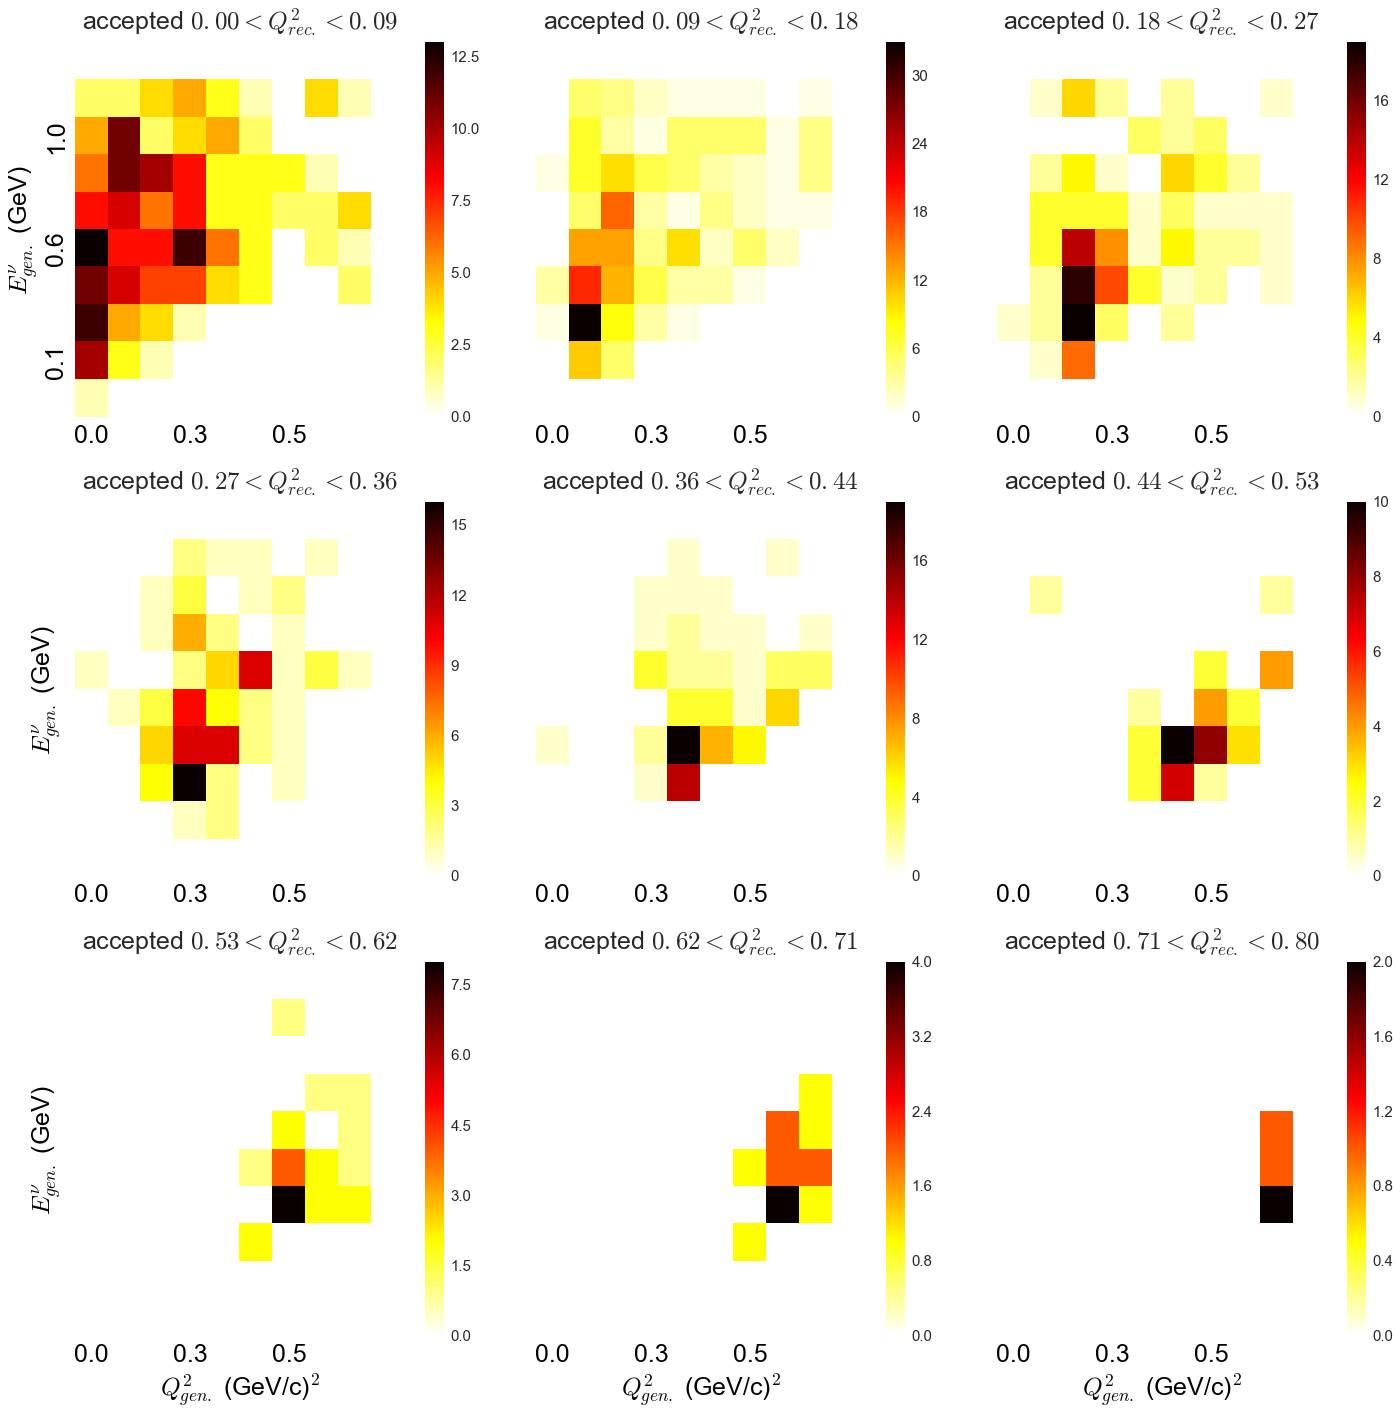

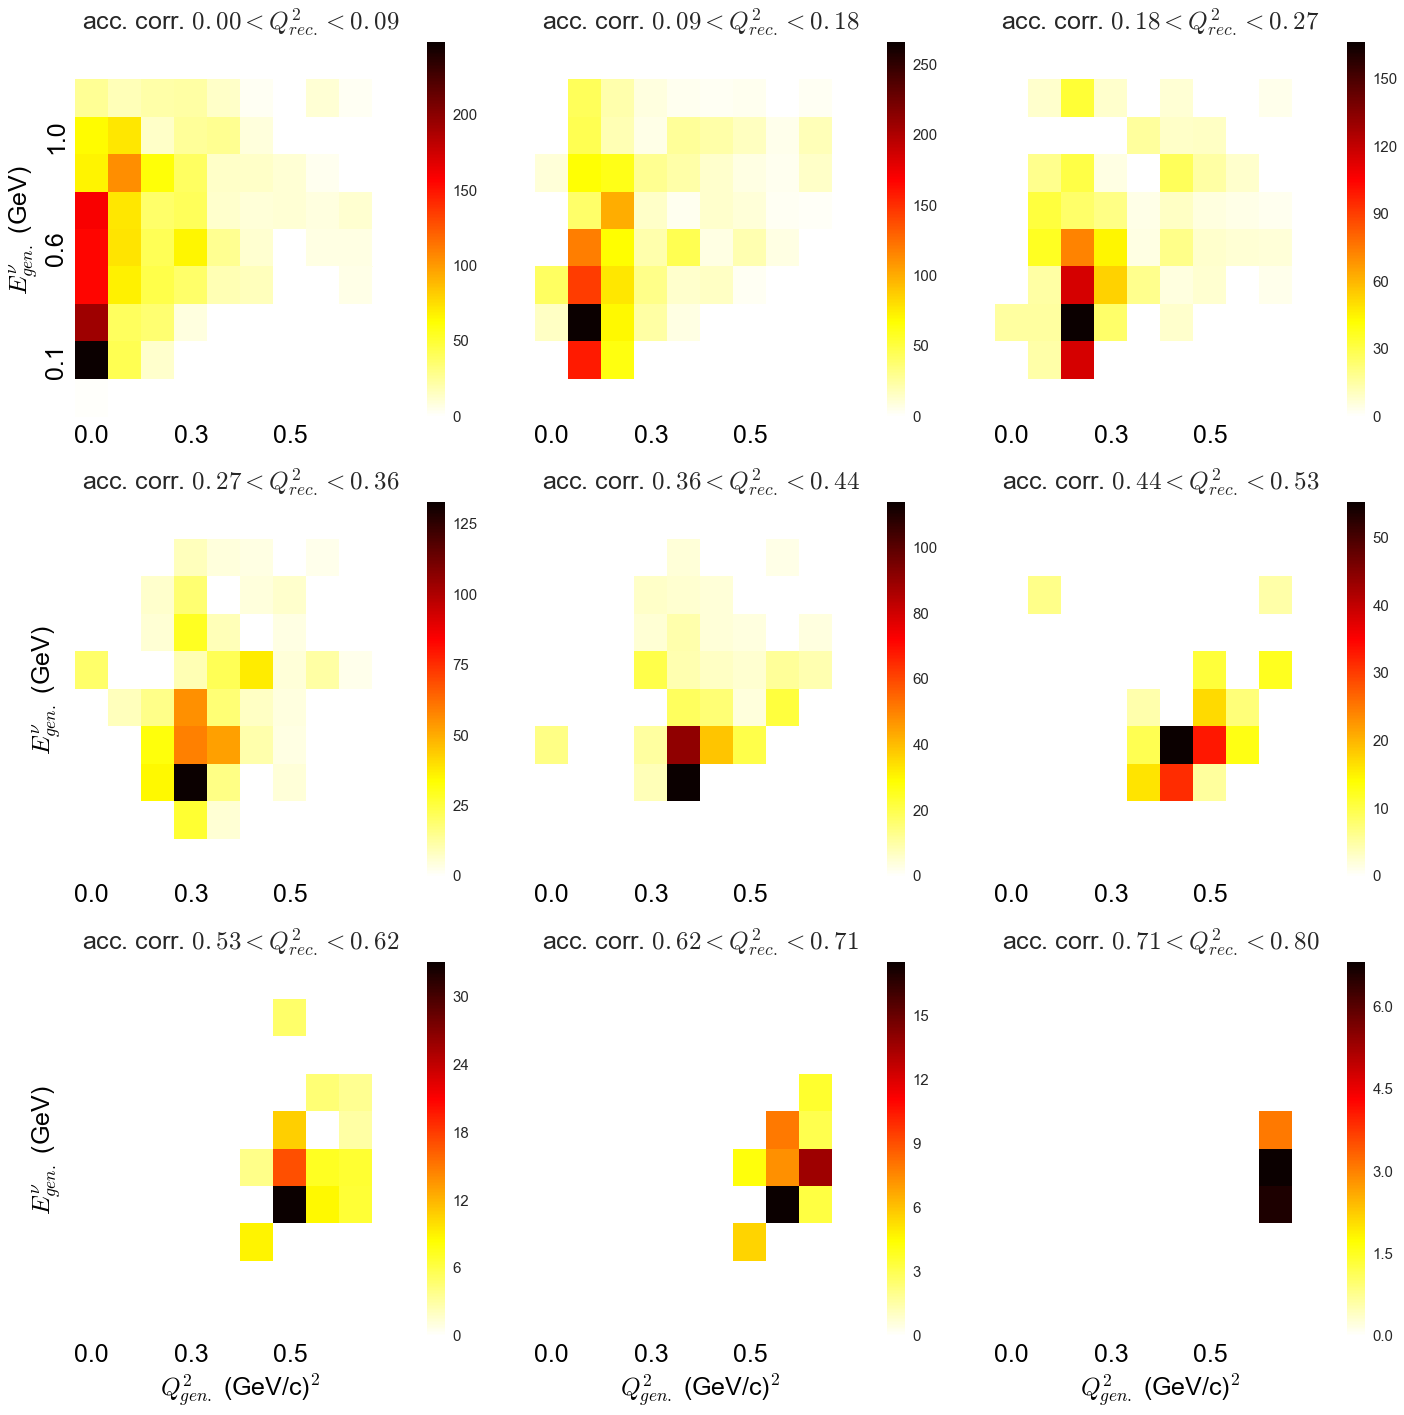

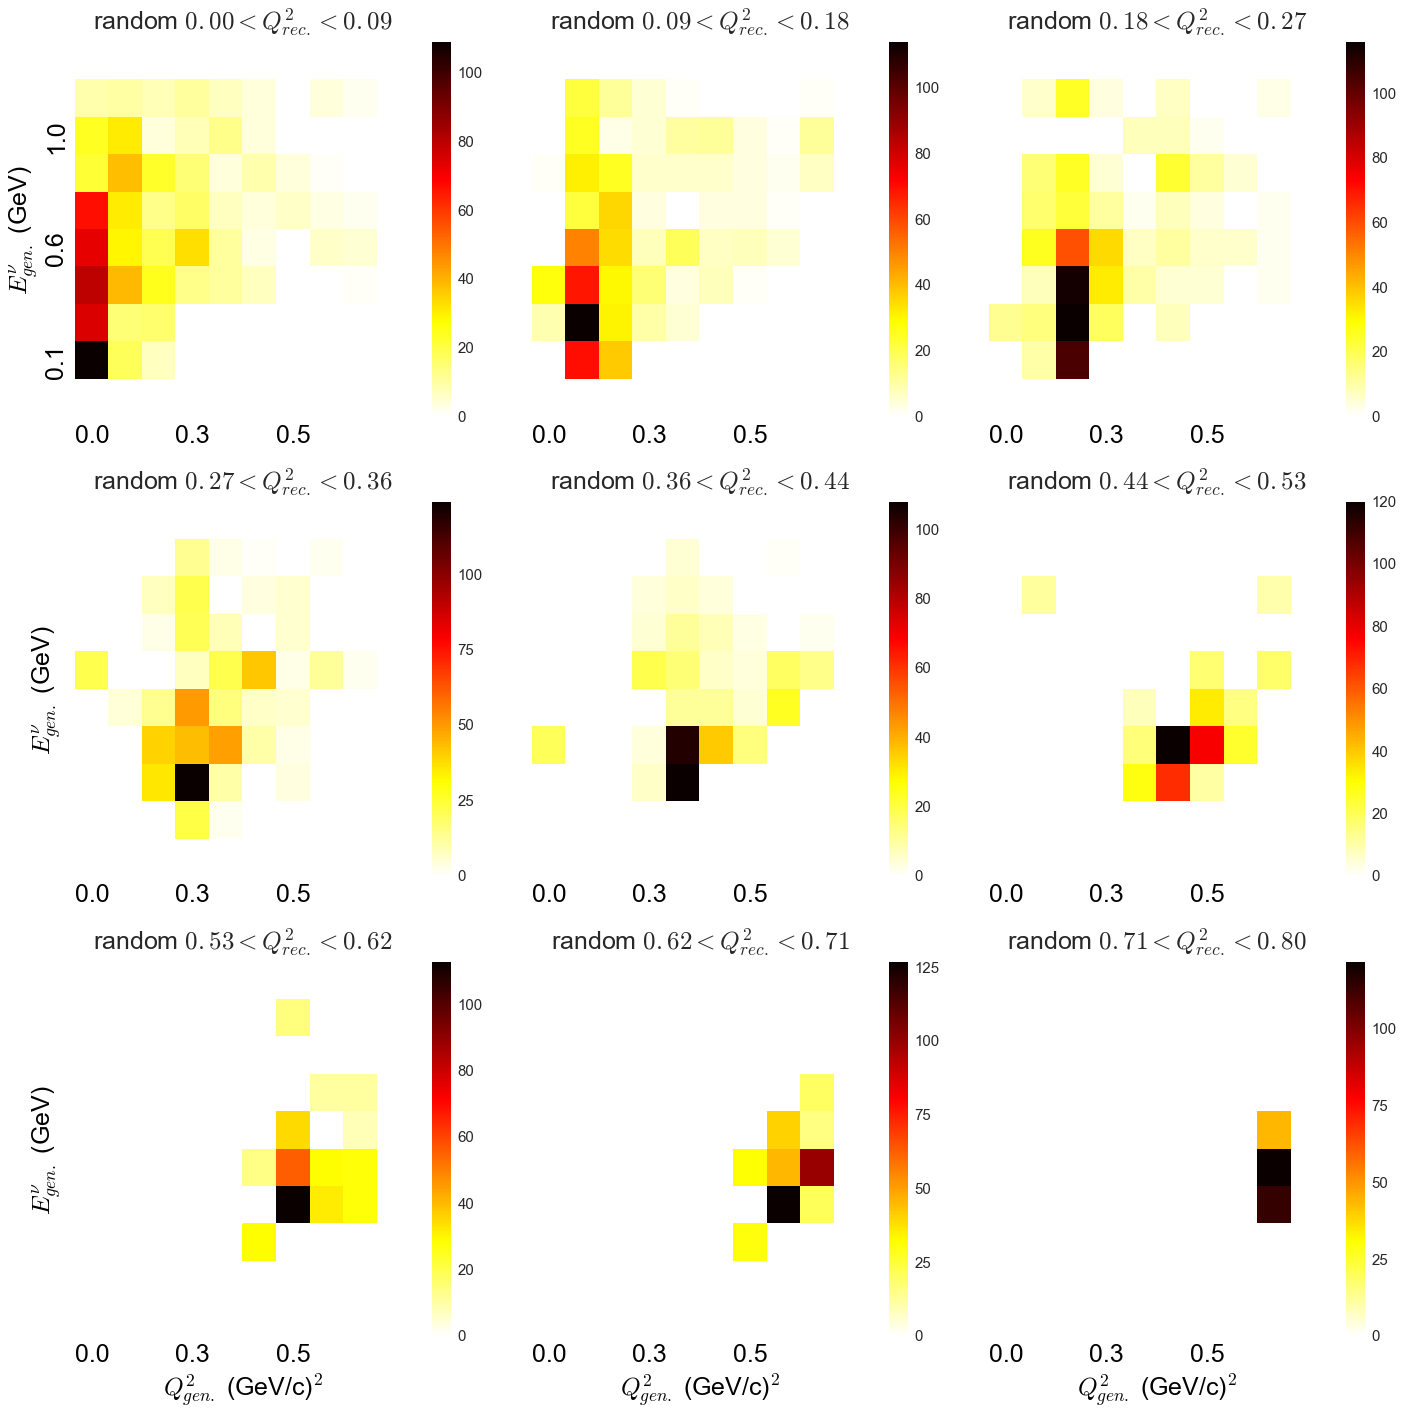

In [154]:
plot_Q2_Ev_distribution_in_reQ2_bins(histo_array=h_accepted_array,histtitle='accepted')
plot_Q2_Ev_distribution_in_reQ2_bins(histo_array=h_acceptance_corrected_array,histtitle='acc. corr.')
plot_Q2_Ev_distribution_in_reQ2_bins(histo_array=h_random_array,histtitle='random')

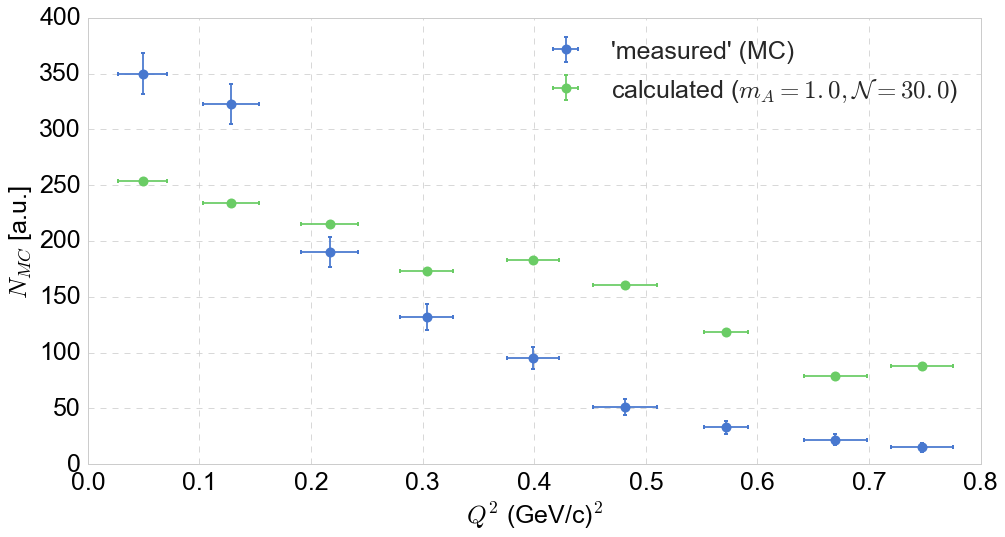

In [162]:
fig,ax = plt.subplots(figsize=(16,8))
for y,yerr,label in zip([N_measured,N_calculated]
                        ,[N_measured_err,N_calculated_err]
                        ,["'measured' (MC)" , r"calculated ($m_A=%.1f,\mathcal{N}=%.1f$)"%(mA,NormFact)]):
    plt.errorbar(x=Q2_averages,xerr=Q2_stds
                 ,y=y,yerr=yerr
                 ,fmt='o'
                 ,markersize=10,capthick=2,capsize=2
                 ,label=label)
set_axes(ax,r'$Q^2$ (GeV/c)$^2$','$N_{MC}$ [a.u.]'
         ,do_add_grid=True,do_add_legend=True)